In [1]:
import os
os.getcwd()

'/home/shannonhuang/mtcnn-pytorch/notebooks'

In [2]:
os.chdir('..')
os.getcwd()

'/home/shannonhuang/mtcnn-pytorch'

In [3]:
from mtcnn.detector import detect_faces, detect_faces_in_all_orientations

In [4]:
from PIL import Image
from glob import glob
validation_images = glob('../sd-style-transfer-prod/test_images/testing_data/baby_02.png')
len(validation_images)

1

In [5]:
import numpy as np
import cv2
from PIL import Image, ImageOps
import os

def resize(image, max_dim=768):
    w, h = image.size
    if w > h:
        if w > max_dim:
            h *= max_dim / w
            w = max_dim
    else:
        if h > max_dim:
            w *= max_dim / h
            h = max_dim
    image = image.resize((int(w), int(h)))
    return image

def show_detected_faces(filename, threshold=0.98, rotate_angle=0):
    image = Image.open(filename)
    image = image.convert('RGB')
    image = resize(image)
    image = ImageOps.exif_transpose(image)
    if rotate_angle>0:
        image = image.rotate(angle=rotate_angle, expand=True)
    boxes = detect_faces(image)[0]
    image = ImageOps.exif_transpose(image)
    rgb_img = np.array(resize(image))
    for b in boxes:
        if b[4] < threshold:
            continue
        b = [int(round(value)) for value in b]
        cv2.rectangle(rgb_img, (b[0], b[1]), (b[2], b[3]), (0,255,0), 2)

    return Image.fromarray(rgb_img)
    
def show_detected_faces_from_multiorientation(filename, threshold=0.98):
    image = Image.open(filename)
    image = image.convert('RGB')
    image = resize(image)
    image = ImageOps.exif_transpose(image)
    boxes = detect_faces_in_all_orientations(image)
    print(boxes)
    rgb_img = np.array(resize(image))
    for b in boxes:
        if b[4] < threshold:
            continue
        b = [int(round(value)) for value in b]
        cv2.rectangle(rgb_img, (b[0], b[1]), (b[2], b[3]), (0,255,0), 2)

    return Image.fromarray(rgb_img)

[[103.94373862  94.26494312 395.80891959 338.47853804   0.88353944]
 [138.94663269 105.3943143  429.50356923 335.09404385   0.99996066]]


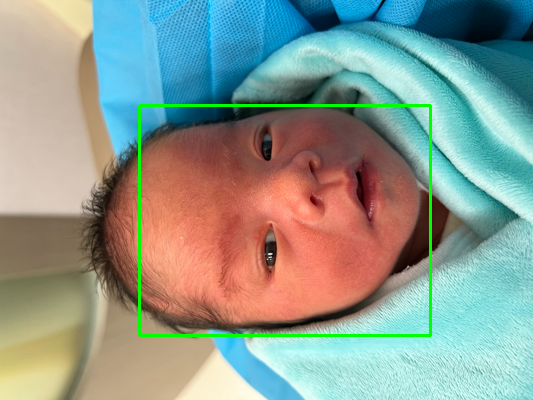

In [6]:
show_detected_faces_from_multiorientation(validation_images[0])

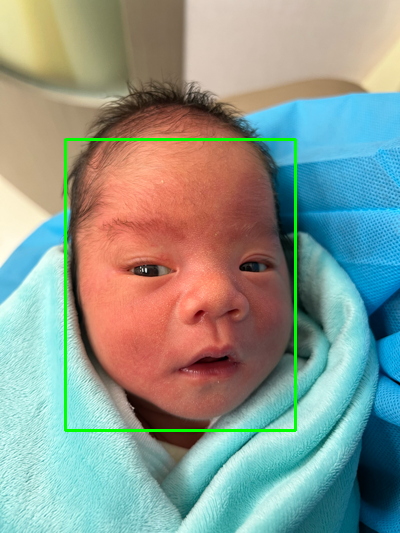

In [7]:
show_detected_faces(validation_images[0], rotate_angle=270)